In [31]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import plotly.express as px
from datetime import datetime




# Step 1: Data Preprocessing

In [32]:
fg = pd.read_csv('csv_files/fear_greed_index.csv', parse_dates=['date'])
traders = pd.read_csv('csv_files/historical_data.csv')   

In [33]:
fg.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [34]:
traders.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

# Normalize Sentiment Dataset

In [ ]:

fg['Date'] = pd.to_datetime(fg['date']).dt.date
fg = fg[['Date', 'classification']].dropna()
fg.rename(columns={'classification': 'Market Sentiment'}, inplace=True)


In [18]:
traders.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

# Normalize Trader Dataset

In [ ]:

traders['Date'] = pd.to_datetime(traders['Timestamp IST'], errors='coerce').dt.date

traders['Execution Price'] = pd.to_numeric(traders['Execution Price'], errors='coerce')
traders['Size USD'] = pd.to_numeric(traders['Size USD'], errors='coerce')
traders['Closed PnL'] = pd.to_numeric(traders['Closed PnL'], errors='coerce')


# Merge Datasets

In [39]:
merged_df = pd.merge(traders, fg, on='Date', how='inner')


# Feature Engineering

In [41]:
merged_df['Profitability'] = merged_df['Closed PnL']
merged_df['Trade Volume'] = merged_df['Size USD']
merged_df['Is Long'] = merged_df['Side'].str.lower().map({'buy': 1, 'sell': 0})  # Binary direction


# Analysis Ideas

# Profitability vs Sentiment

<Axes: title={'center': 'Average Profitability by Market Sentiment'}, xlabel='Market Sentiment'>

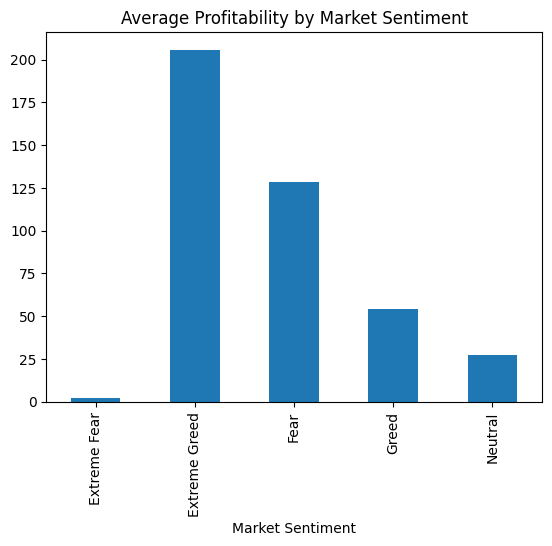

In [42]:
profit_sentiment = merged_df.groupby('Market Sentiment')['Profitability'].mean()
profit_sentiment.plot(kind='bar', title='Average Profitability by Market Sentiment')


# Risk Appetite (Leverage/Volume) vs Sentiment

<Axes: title={'center': 'Risk Appetite by Sentiment'}, xlabel='Market Sentiment'>

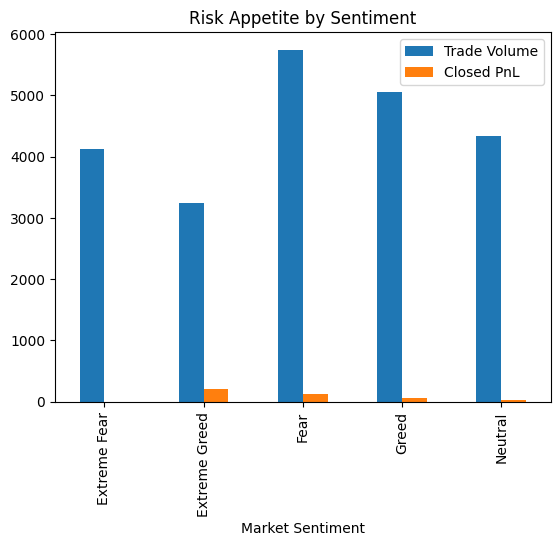

In [43]:
risk_metrics = merged_df.groupby('Market Sentiment')[['Trade Volume', 'Closed PnL']].mean()
risk_metrics.plot(kind='bar', title='Risk Appetite by Sentiment')


# Long vs Short Ratio

<Axes: title={'center': 'Long Trade Ratio by Sentiment'}, xlabel='Market Sentiment'>

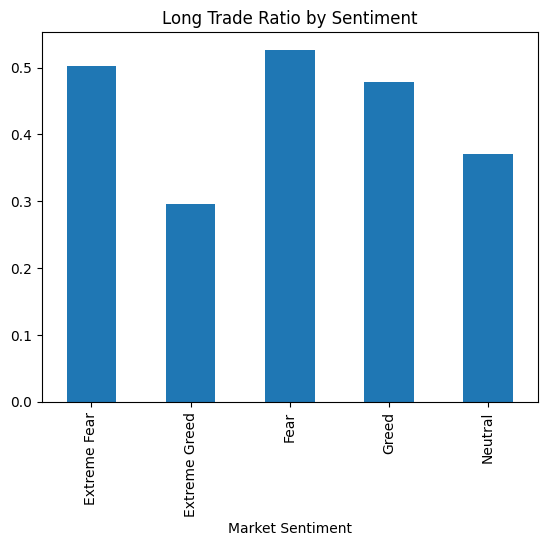

In [44]:
long_short = merged_df.groupby('Market Sentiment')['Is Long'].mean()
long_short.plot(kind='bar', title='Long Trade Ratio by Sentiment')


# Hidden Trend Exploration

<Axes: xlabel='Date', ylabel='Closed PnL'>

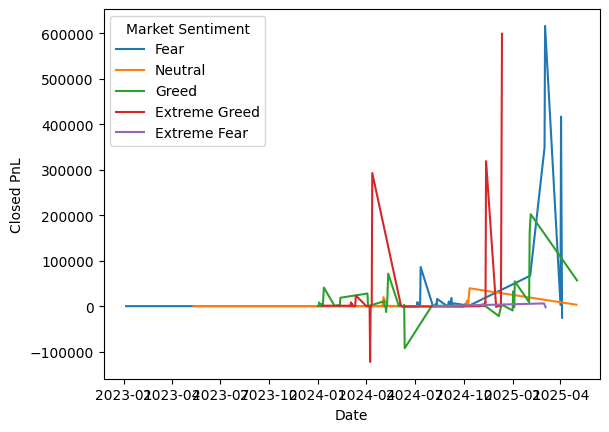

In [45]:
daily = merged_df.groupby(['Date', 'Market Sentiment']).agg({
    'Closed PnL': 'sum',
    'Size USD': 'sum'
}).reset_index()

# Plot daily trends
import seaborn as sns
sns.lineplot(data=daily, x='Date', y='Closed PnL', hue='Market Sentiment')
